# Monte carlo

Some imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Suppose we want to estimate
$$
\mu = \int^1_0 \frac{1}{1+x} dx
$$

Let $m = f(U) = 1 / (1 + U)$ and $U$ follow a uniform distribution on $[0, 1]$. Since 
$$
\mu = \mathbb E (f(U))
$$
if we have a sample of size $n$ for $U$, i.e., $\{u_1, \cdots, u_n\}$, then the monte carlo simulation is
$$
\mu \approx \frac{1}{n} \sum_i f(u_i)
$$

In [2]:
def f(u):
    return 1 / (1 + u)

In [3]:
n = 1_500
u = np.random.rand(n)
μ = f(u).sum() / n

In [4]:
μ

0.6961499511493515

In [5]:
np.var(f(u))

0.019916326465205202

# Control variates

Introduce $t= g(U)= 1 + U$ as a control variate with a known expected value 
$$
\mathbb E [ t] = \mathbb E [ g(U)] = \int^1_0 (1 + x) dx = 3/2 = \tau
$$

Combine these two into a new estimate
$$
\mu_{cv} \approx \frac{1}{n} \sum_i f(u_i) + c^* \left ( \frac{1}{n} \sum_i g(u_i) - 3/2  \right )
$$
- where $c^*$ is an estimated optimal coefficient, carefully chosen by giving $m$ and $t$.

In [42]:
def g(u):
    return -1 / (1 + u)

In [43]:
def c_star(m, t):
    return - np.cov(m, t)[0, 1] / np.var(t)

In [44]:
g = g(u)

In [45]:
c_star = c_star(f(u), g)

In [46]:
def control_variate(m, t, 
                    c=c_star, 
                    τ=-0.6932):
    
    return m + c * (t - τ)

In [47]:
np.corrcoef(f(u), g)

array([[ 1., -1.],
       [-1.,  1.]])

In [48]:
cv = control_variate(f(u), g)
μ_cv = cv.sum() / n

In [49]:
μ_cv

0.6931980320539363

In [50]:
np.var(cv)

8.863514731499787e-09

In [51]:
import pandas as pd

In [52]:
d = {"m": f(u), "cv": cv}

In [53]:
df = pd.DataFrame(d, columns=['m','cv'])
df

,m,cv
0,0.653753,0.693226
1,0.789214,0.693136
2,0.887089,0.693071
3,0.566879,0.693284
4,0.874927,0.693079
...,...,...
1495,0.759483,0.693156
1496,0.613061,0.693253
1497,0.750312,0.693162
1498,0.844427,0.693099


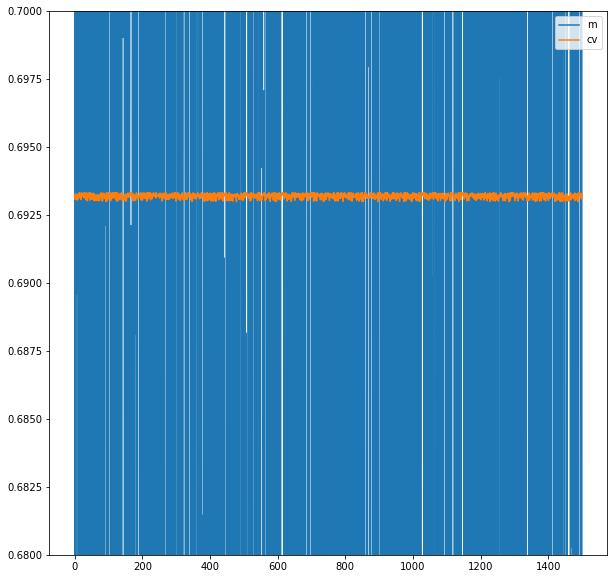

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))

df.plot(y=["m", "cv"],
        kind="line", ax=ax)

plt.ylim(0.68, 0.70)
# display plot
plt.show()